In [6]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('C:\\workspace\\WASSUP4\\data\\mini.csv', sep=',')

# 데이터 준비 - 필요한 변수만 추출하여 프리미엄 전환 가능성 예측
X = df[['average_time_per_learning_session', 'monthly_active_learning_days', 
        'community_engagement_level', 'customer_inquiry_history']]
y = df['target']  # 프리미엄 전환 여부

# 상수 추가
X = sm.add_constant(X)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# 결과 요약 출력
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.657209
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7995
Method:                           MLE   Df Model:                            4
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                 0.01060
Time:                        00:39:37   Log-Likelihood:                -5257.7
converged:                       True   LL-Null:                       -5314.0
Covariance Type:            nonrobust   LLR p-value:                 2.009e-23
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.2218      0.093      2

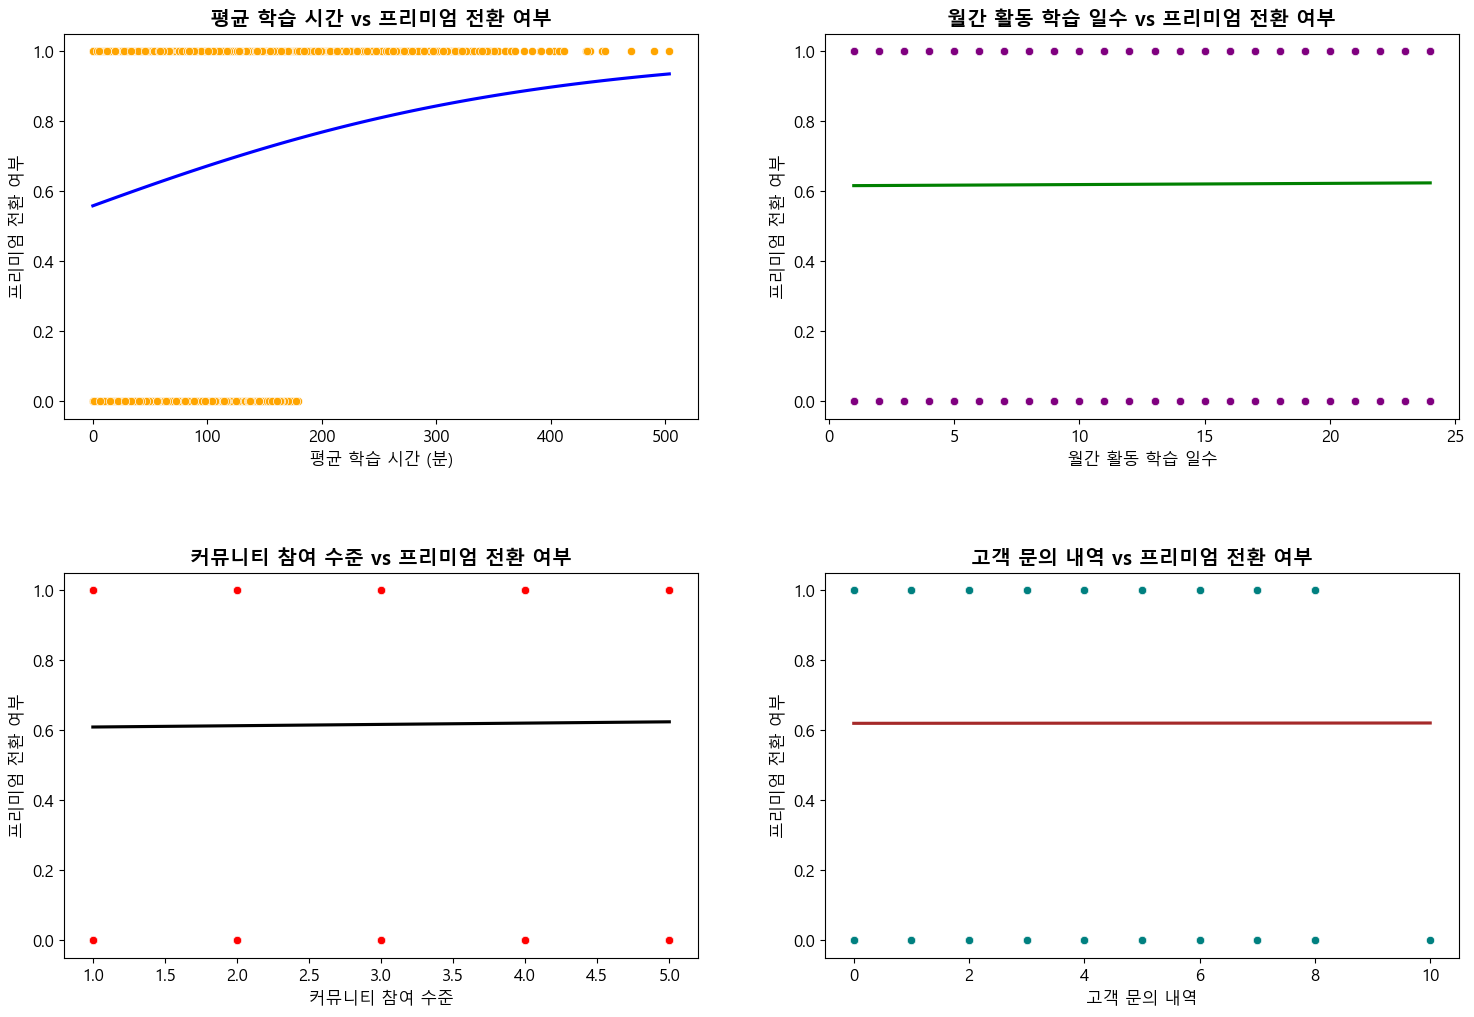

In [42]:
# Try a simplified version of plotting to avoid long computation time
plt.figure(figsize=(18, 12))
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"  # Malgun Gothic font path

font_prop = font_manager.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name()) 
plt.rcParams['font.size'] = 12

# Plot 1: Average Time Per Learning Session vs Premium Upgrade
plt.subplot(2, 2, 1)
sns.scatterplot(x='average_time_per_learning_session', y='target', data=df, color='orange')
sns.regplot(x='average_time_per_learning_session', y='target', data=df, logistic=True, scatter=False, color='blue', ci=None)
plt.title("평균 학습 시간 vs 프리미엄 전환 여부", fontweight='bold')
plt.xlabel("평균 학습 시간 (분)")
plt.ylabel("프리미엄 전환 여부")

# Plot 2: Monthly Active Learning Days vs Premium Upgrade
plt.subplot(2, 2, 2)
sns.scatterplot(x='monthly_active_learning_days', y='target', data=df, color='purple')
sns.regplot(x='monthly_active_learning_days', y='target', data=df, logistic=True, scatter=False, color='green', ci=None)
plt.title("월간 활동 학습 일수 vs 프리미엄 전환 여부", fontweight='bold')
plt.xlabel("월간 활동 학습 일수")
plt.ylabel("프리미엄 전환 여부")

# Plot 3: Community Engagement Level vs Premium Upgrade
plt.subplot(2, 2, 3)
sns.scatterplot(x='community_engagement_level', y='target', data=df, color='red')
sns.regplot(x='community_engagement_level', y='target', data=df, logistic=True, scatter=False, color='black', ci=None)
plt.title("커뮤니티 참여 수준 vs 프리미엄 전환 여부", fontweight='bold')
plt.xlabel("커뮤니티 참여 수준")
plt.ylabel("프리미엄 전환 여부")

# Plot 4: Customer Inquiry History vs Premium Upgrade
plt.subplot(2, 2, 4)
sns.scatterplot(x='customer_inquiry_history', y='target', data=df, color='teal')
sns.regplot(x='customer_inquiry_history', y='target', data=df, logistic=True, scatter=False, color='brown', ci=None)
plt.title("고객 문의 내역 vs 프리미엄 전환 여부", fontweight='bold')
plt.xlabel("고객 문의 내역")
plt.ylabel("프리미엄 전환 여부")

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.4, wspace=0.2)
# plt.tight_layout()
plt.show()
